In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Importando a biblioteca
import pysnnblaze as pb

## Funções auxiliares

In [27]:
def plot_spikes_for_neuron(spike_events, neuron_idx, max_time, title=''):
    # Filter spike times for the specified neuron
    times = [t for t, n in spike_events if n == neuron_idx]

    if not times:
        print(f"No spikes found for neuron {neuron_idx}")
        return

    amplitudes = [1] * len(times)
    plt.figure(figsize=(6, 2), dpi=120)
    plt.stem(times, amplitudes)
    plt.title(title)
    plt.xlabel("Tempo (s)")
    plt.ylabel("Pulso")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(0, 1.2)  # some space above spikes
    plt.xlim(0, max_time)  # some space above spikes
    plt.show()

def plot_state_for_neuron(state_events, neuron_idx, max_time, title=''):
    times = []
    values = []
    
    for t, state_vector in state_events:
        if t <= max_time:
            times.append(t)
            values.append(state_vector[neuron_idx])  # pick neuron_idx value

    if not times:
        print(f"No state data found for neuron {neuron_idx}")
        return

    plt.figure(figsize=(6, 4), dpi=120)
    plt.plot(times, values, linewidth=1)
    plt.title(title)
    plt.xlabel("Tempo (s)")
    plt.ylabel("Potencial da membrana")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim(0, max_time)
    plt.show()

## Instanciando um modelo de neurônio

In [28]:
# Parâmetros do neurônio - LIF
tau_m = 20e-3       # Constante de tempo (decaimento exponencial)
C_m = 1             # Capacitância da membrana
v_rest = -70e-3     # Potencial de repouso
v_reset = -70e-3    # Potencial após geração de pulso
v_thresh = -50e-3   # Limiar de disparo
refractory = 5e-3   # Período refratário

lif_neuron = pb.LIFNeuron(tau_m=tau_m, C_m=C_m, v_rest=v_rest, v_reset=v_reset, v_thresh=v_thresh, refractory=refractory)

## Criando monitores

In [29]:
# Monitor de pulsos (eventos)
spike_monitor = pb.SpikeMonitor()

# Monitor de estado (potencial de membrana) - Leituras periódicas
state_monitor = pb.StateMonitor(reading_interval=0.1e-3)

## Simulação simples - Neurônio isolado

In [30]:
# O objeto da rede é responsável pela simulação
nn = pb.NeuralNetwork()

nn.add_neuron_population(1, lif_neuron)

# Associando os monitores para recuperar saídas
nn.set_spike_monitor(spike_monitor)
nn.set_state_monitor(state_monitor)

# Agendando pulsos de entrada
nn.schedule_spike_event(0.1, 0, 10e-3)
nn.schedule_spike_event(0.12, 0, 15e-3)
nn.schedule_spike_event(0.13, 0, 10-3)

# Executando a simulação por 0.2 segundo
nn.run(0.2)

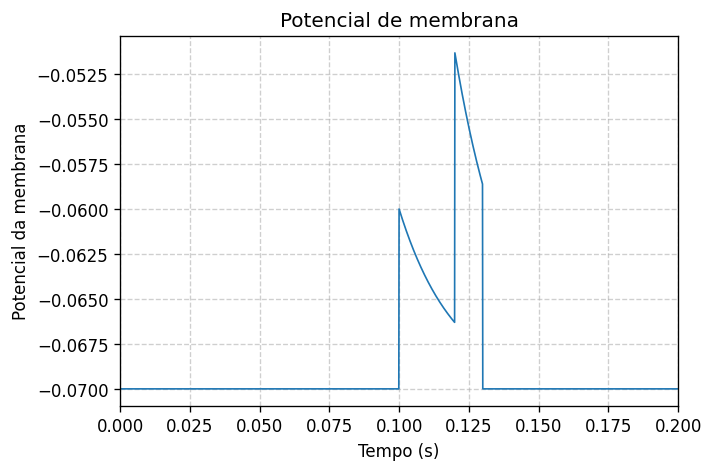

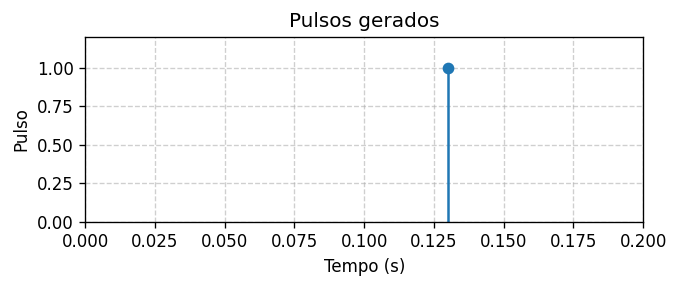

In [31]:
plot_state_for_neuron(state_monitor.state_vector_list, neuron_idx=0, max_time=0.2, title='Potencial de membrana')
plot_spikes_for_neuron(spike_monitor.spike_list, neuron_idx=0, max_time=0.2, title='Pulsos gerados')

## Simulando uma rede
A seguinte rede é simulada:

![Alt text](example_net_diagram.png)

In [32]:
# Criando a rede e seus monitores
example_net = pb.NeuralNetwork()
spike_monitor = pb.SpikeMonitor()
state_monitor = pb.StateMonitor(reading_interval=0.1e-3)
example_net.set_spike_monitor(spike_monitor)
example_net.set_state_monitor(state_monitor)

# Definindo os tipos de neurônio da rede
lif_neuron1 = pb.LIFNeuron(tau_m=20e-3, C_m=1, v_rest=-70e-3, v_reset=-70e-3, v_thresh=-50e-3, refractory=2e-3)
lif_neuron2 = pb.LIFNeuron(tau_m=60e-3, C_m=2, v_rest=-70e-3, v_reset=-70e-3, v_thresh=-50e-3, refractory=2e-3)
inp_neuron = pb.InputNeuron()

# Adicionando as populações de neurônios
example_net.add_neuron_population(1, inp_neuron)  # index 0
example_net.add_neuron_population(2, lif_neuron1) # index 1,2
example_net.add_neuron_population(1, lif_neuron2) # index 3

# Criando as sinapses
synapses = [
    pb.Synapse(0, 1, 10e-3, 5e-3),
    pb.Synapse(1, 2, 15e-3, 5e-3),
    pb.Synapse(2, 3, 20e-3, 5e-3),
    pb.Synapse(3, 1, 10e-3, 5e-3),
]
# Adicionado as sinapses à rede
for syn in synapses:
    example_net.add_synapse(syn)

# Agendando 50 pulsos de entrada
for i in range(50):
    example_net.schedule_spike_event(0.002*i, 0, 20e-3)

# Verificando o tamanho da rede
print(f'Network size: {example_net.size()}')

# Executando uma simulação por 200 ms
example_net.run(200e-3)

Network size: 4


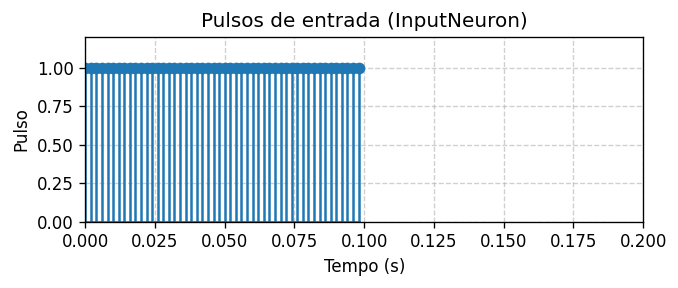

In [33]:
# Pulsos de entrada
plot_spikes_for_neuron(spike_monitor.spike_list, neuron_idx=0, max_time=200e-3, title='Pulsos de entrada (InputNeuron)')

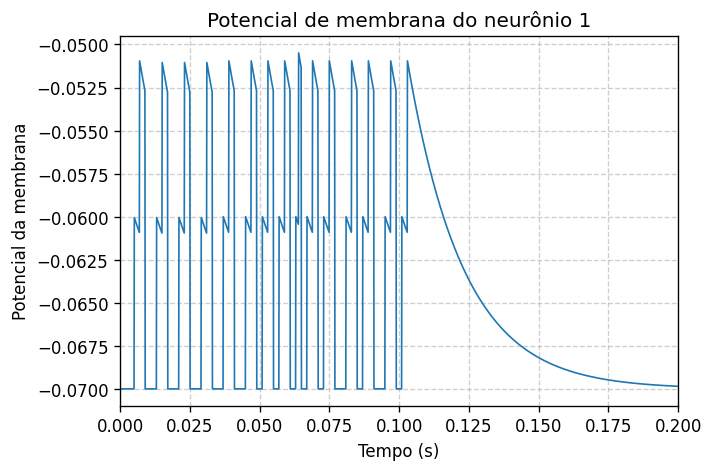

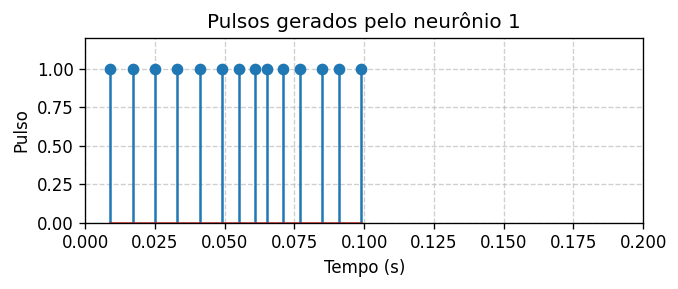

In [34]:
# Estado e pulsos gerados pelo neurônio 1
plot_state_for_neuron(state_monitor.state_vector_list, neuron_idx=1, max_time=200e-3, title='Potencial de membrana do neurônio 1')
plot_spikes_for_neuron(spike_monitor.spike_list, neuron_idx=1, max_time=200e-3, title='Pulsos gerados pelo neurônio 1')

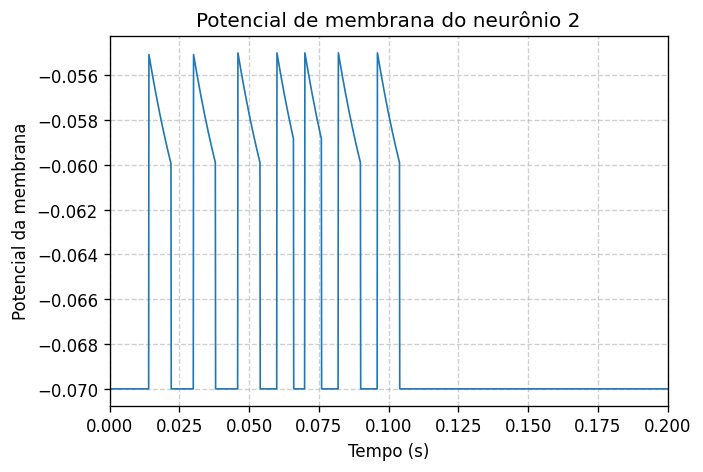

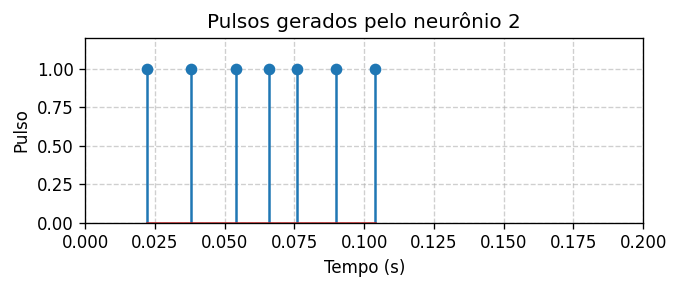

In [35]:
# Estado e pulsos gerados pelo neurônio 2
plot_state_for_neuron(state_monitor.state_vector_list, neuron_idx=2, max_time=200e-3, title='Potencial de membrana do neurônio 2')
plot_spikes_for_neuron(spike_monitor.spike_list, neuron_idx=2, max_time=200e-3, title='Pulsos gerados pelo neurônio 2')

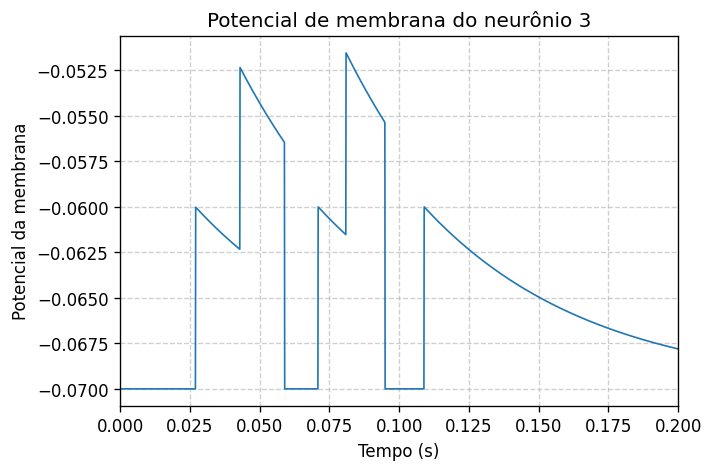

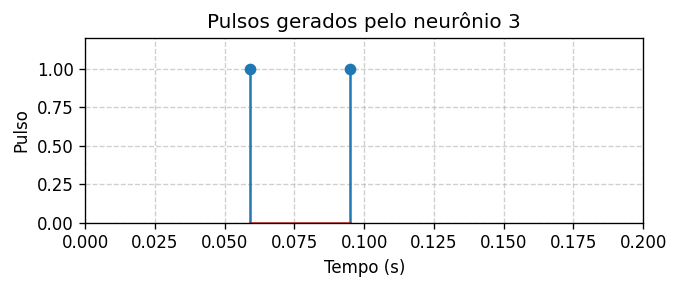

In [36]:
# Estado e pulsos gerados pelo neurônio 3
plot_state_for_neuron(state_monitor.state_vector_list, neuron_idx=3, max_time=200e-3, title='Potencial de membrana do neurônio 3')
plot_spikes_for_neuron(spike_monitor.spike_list, neuron_idx=3, max_time=200e-3, title='Pulsos gerados pelo neurônio 3')